In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn.objects as so

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [ ]:
df = pd.read_csv('../result/240226-192123.csv')
df2 = pd.read_csv('../result/240226-212406.csv')
df3 = pd.read_csv('../result/240226-234620.csv')

df['dataset'] = 'tfinance'
df2['dataset'] = 'amazon'
df3['dataset'] = 'yelp'

full_df = pd.concat([df, df2, df3])

In [49]:
full_df.query('eval_type == "round_0_nodes"').groupby(['dataset', 'model_name'])['auc'].mean().reset_index().pivot(index='model_name', columns=['dataset'], values='auc')

dataset,amazon,tfinance,yelp
model_name,,,
BWGNN,0.975580,0.908708,0.796565
GAT,0.748391,0.555694,0.726806
GCN,0.754637,0.854191,0.579750
GIN,0.903669,0.899534,0.719022
GraphSAGE,0.578989,0.561586,0.739021
XGB,0.983649,0.968641,0.958056


In [20]:
round_df = pd.read_csv('../result/240306-165808.csv')
round_df['round_int'] = round_df.apply(lambda x: int(x['round'][6]) + 1, axis=1)
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['greedy_seed', 'feat_coef', 'conn_coef', 'trial', 'round_int'])
round_result_df['f1_degradation'] = (round_result_df['f1'] - round_result_df['f1'].shift(-1))
round_result_df['auc_degradation'] = (round_result_df['auc'] - round_result_df['auc'].shift(-1))

final_df = round_result_df.groupby(['greedy_seed', 'feat_coef', 'conn_coef', 'round_int'])[['f1', 'f1_degradation', 'auc', 'auc_degradation', 'tp', 'fp', 'tn', 'fn']].agg(['mean', 'std']).reset_index()
final_df.columns = [' '.join(col).strip() for col in final_df.columns.values]


c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

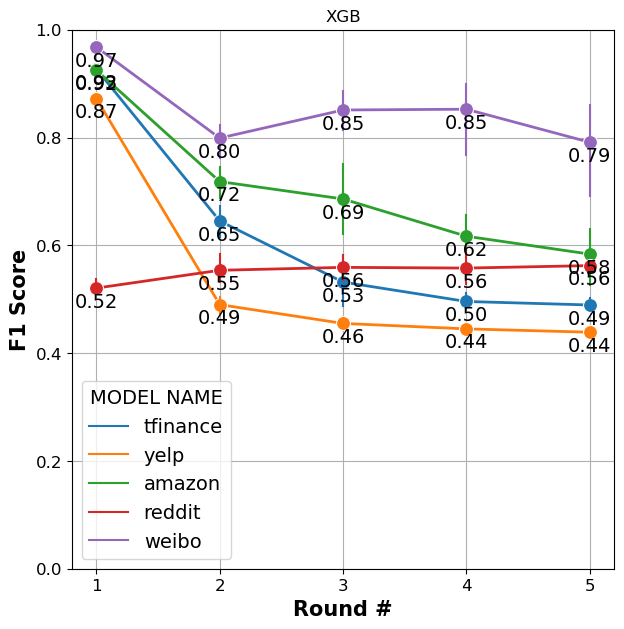

c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

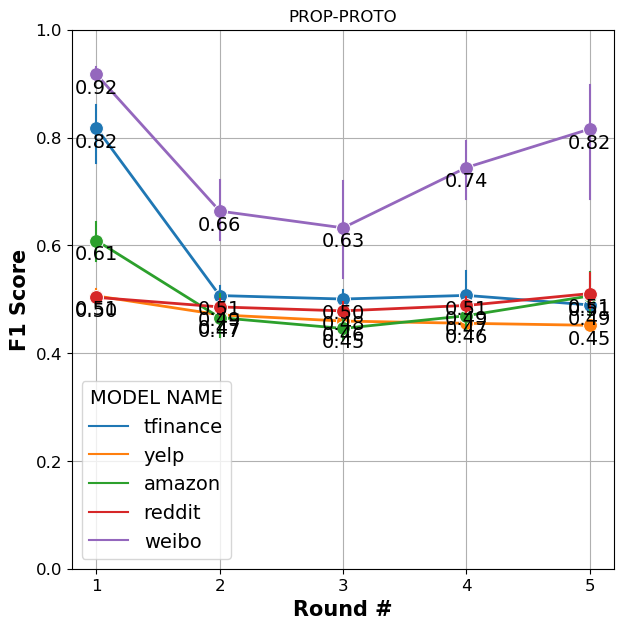

In [25]:
import matplotlib.pyplot as plt
from matplotlib import ticker


out_colname = 'model_name'
out_col_vals = round_result_df[out_colname].unique()
for out_val in out_col_vals:
    temp_df = round_result_df.query(f'{out_colname} == "{out_val}"')

    colname = 'dset_name'
    col_vals = temp_df[colname].unique()
    data = []

    for val in col_vals:
        data.append(temp_df.groupby([colname, 'round_int'])[['f1', 'auc']].mean().reset_index().query(f'{colname} == "{val}" & round_int < 6')[['round_int', 'f1']].values)

    fig, ax = plt.subplots(figsize=(7, 7))
    p1 = sb.lineplot(data=temp_df.query('round_int < 6'), x='round_int', y='f1', hue=colname, linewidth=2, err_style='bars', marker='o', markersize=10)
    plt.legend()

    for vals in data:
        for i in vals:
                ax.text(i[0], i[1] - 0.025,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    plt.legend(title='MODEL NAME', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0, 1))
    plt.title(out_val)


    plt.grid()
    plt.show()


# PROTONUM PROTO NUM

In [9]:
a = pd.read_csv('../result/240313-074105.csv')
b1 = pd.read_csv('../result/240313-030945-INNER-REPLAY-tfinance-PROP-PROTO-True-0-0-1.csv')
b2 = pd.read_csv('../result/240313-030945-INNER-REPLAY-tfinance-PROP-PROTO-True-0-0-2.csv')
b3 = pd.read_csv('../result/240313-030945-INNER-REPLAY-tfinance-PROP-PROTO-True-0-0-4.csv')
b4 = pd.read_csv('../result/240313-030945-INNER-REPLAY-tfinance-PROP-PROTO-True-0-0-8.csv')
b5 = pd.read_csv('../result/240313-030945-INNER-REPLAY-tfinance-PROP-PROTO-True-0-0-10.csv')

In [11]:
round_df = pd.concat([a, b1, b2, b3, b4, b5])
round_df['proto_num'] = round_df['proto_num'].astype(str)
round_df['round_int'] = round_df.apply(lambda x: int(x['round'][6]) + 1, axis=1)
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['greedy_seed', 'feat_coef', 'conn_coef', 'trial', 'round_int'])
round_result_df['f1_degradation'] = (round_result_df['f1'] - round_result_df['f1'].shift(-1))
round_result_df['auc_degradation'] = (round_result_df['auc'] - round_result_df['auc'].shift(-1))

final_df = round_result_df.groupby(['greedy_seed', 'feat_coef', 'conn_coef', 'round_int'])[['f1', 'f1_degradation', 'auc', 'auc_degradation', 'tp', 'fp', 'tn', 'fn']].agg(['mean', 'std']).reset_index()
final_df.columns = [' '.join(col).strip() for col in final_df.columns.values]


c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

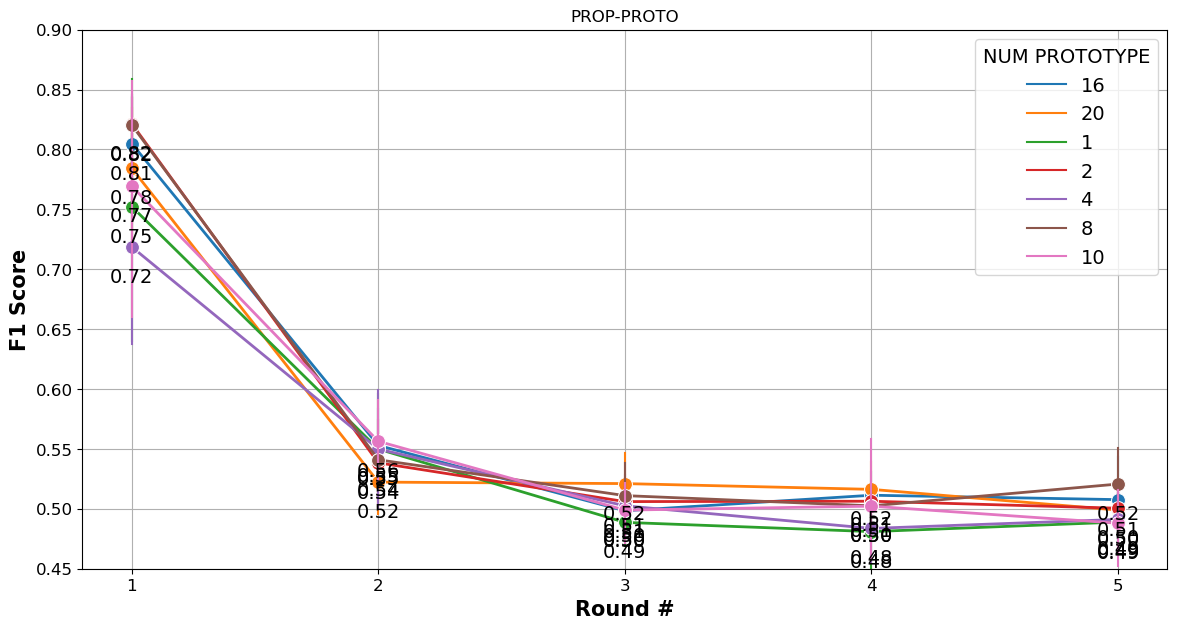

In [14]:
import matplotlib.pyplot as plt
from matplotlib import ticker


out_colname = 'model_name'
out_col_vals = round_result_df[out_colname].unique()
for out_val in out_col_vals:
    temp_df = round_result_df.query(f'{out_colname} == "{out_val}"')

    colname = 'proto_num'
    col_vals = temp_df[colname].unique()
    data = []

    for val in col_vals:
        data.append(temp_df.groupby([colname, 'round_int'])[['f1', 'auc']].mean().reset_index().query(f'{colname} == "{val}" & round_int < 6')[['round_int', 'f1']].values)

    fig, ax = plt.subplots(figsize=(14, 7))
    p1 = sb.lineplot(data=temp_df.query('round_int < 6'), x='round_int', y='f1', hue=colname, linewidth=2, err_style='bars', marker='o', markersize=10)
    plt.legend()

    for vals in data:
        for i in vals:
                ax.text(i[0], i[1] - 0.025,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    plt.legend(title='NUM PROTOTYPE', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.45, 0.9))
    plt.title(out_val)


    plt.grid()
    plt.show()


# SPLIT PROTO

In [15]:
round_df = pd.read_csv('../result/240313-094123.csv')
round_df['proto_num'] = round_df['proto_num'].astype(str)
round_df['round_int'] = round_df.apply(lambda x: int(x['round'][6]) + 1, axis=1)
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['greedy_seed', 'feat_coef', 'conn_coef', 'trial', 'round_int'])
round_result_df['f1_degradation'] = (round_result_df['f1'] - round_result_df['f1'].shift(-1))
round_result_df['auc_degradation'] = (round_result_df['auc'] - round_result_df['auc'].shift(-1))

final_df = round_result_df.groupby(['greedy_seed', 'feat_coef', 'conn_coef', 'round_int'])[['f1', 'f1_degradation', 'auc', 'auc_degradation', 'tp', 'fp', 'tn', 'fn']].agg(['mean', 'std']).reset_index()
final_df.columns = [' '.join(col).strip() for col in final_df.columns.values]


In [20]:
round_result_df.columns

Index(['Unnamed: 0', 'round', 'eval_type', 'time', 'rec', 'prec', 'f1', 'auc',
       'tn', 'fp', 'fn', 'tp', 'trial', 'model_name', 'dropout_rate',
       'act_name', 'h_feats', 'num_layers', 'mlp_h_feats', 'mlp_num_layers',
       'att_heads', 'boost_agg_backbone', 'boost_predictor', 'boost_metric',
       'proto_num', 'train_mode', 'etypes', 'random_state', 'batch_size',
       'num_workers', 'num_epoch', 'num_round_epoch', 'initial_ratio',
       'train_ratio', 'optimizer', 'learning_rate', 'loss', 'round_num',
       'round_new_pos', 'round_new_neg', 'round_budget_pos',
       'round_budget_neg', 'round_full_training', 'round_reset_model', 'dset_name',
       'ce_weight', 'adver_name', 'feat_coef', 'conn_coef', 'greedy_seed',
       'timestamp', 'round_int', 'f1_degradation', 'auc_degradation'],
      dtype='object')

In [25]:
round_result_df.groupby('proto_num')[['rec', 'prec', 'f1', 'auc']].agg(['mean', 'std']).reset_index().sort_values(by='proto_num')

proto_num       rec                prec                  f1            \
                 mean       std      mean       std      mean       std   
0         1  0.624148  0.012796  0.695028  0.043999  0.820405  0.007685   
1        10  0.648835  0.023703  0.698022  0.016099  0.828521  0.004043   
2         4  0.631904  0.014207  0.672425  0.026166  0.817393  0.005410   

        auc            
       mean       std  
0  0.852098  0.024790  
1  0.870622  0.019126  
2  0.858168  0.025608

c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

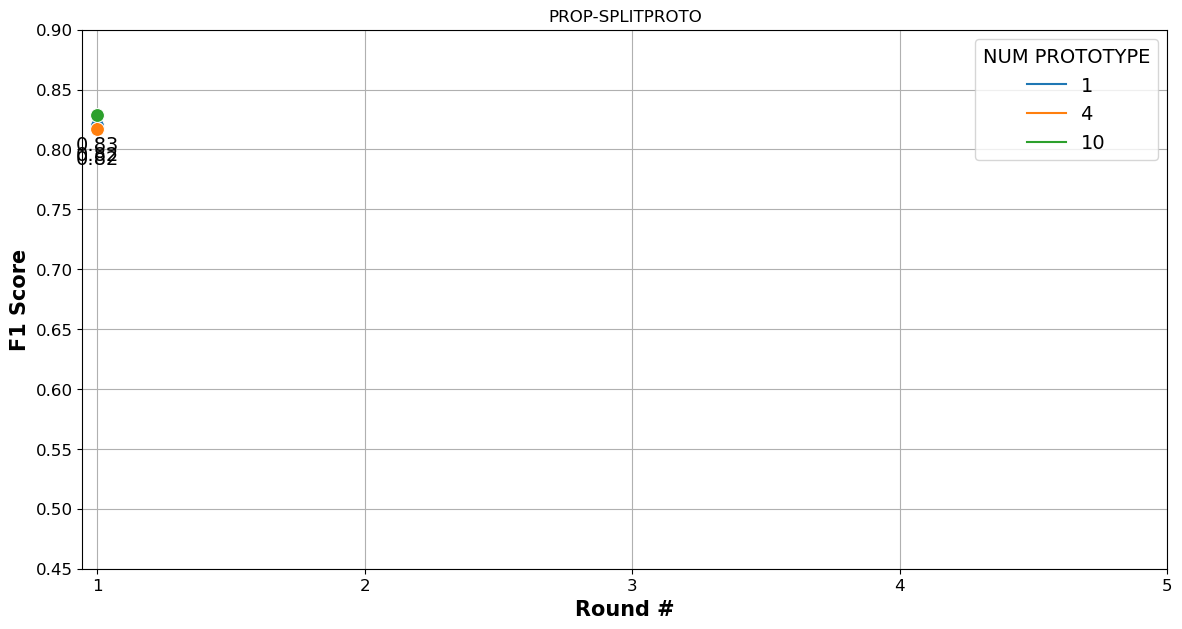

In [16]:
import matplotlib.pyplot as plt
from matplotlib import ticker


out_colname = 'model_name'
out_col_vals = round_result_df[out_colname].unique()
for out_val in out_col_vals:
    temp_df = round_result_df.query(f'{out_colname} == "{out_val}"')

    colname = 'proto_num'
    col_vals = temp_df[colname].unique()
    data = []

    for val in col_vals:
        data.append(temp_df.groupby([colname, 'round_int'])[['f1', 'auc']].mean().reset_index().query(f'{colname} == "{val}" & round_int < 6')[['round_int', 'f1']].values)

    fig, ax = plt.subplots(figsize=(14, 7))
    p1 = sb.lineplot(data=temp_df.query('round_int < 6'), x='round_int', y='f1', hue=colname, linewidth=2, err_style='bars', marker='o', markersize=10)
    plt.legend()

    for vals in data:
        for i in vals:
                ax.text(i[0], i[1] - 0.025,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    plt.legend(title='NUM PROTOTYPE', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.45, 0.9))
    plt.title(out_val)


    plt.grid()
    plt.show()


# Dataset V2

In [2]:
round_df = pd.read_csv('../result/240312-222954.csv')
round_df['proto_num'] = round_df['proto_num'].astype(str)
round_df['round_int'] = round_df.apply(lambda x: int(x['round'][6]) + 1, axis=1)
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['greedy_seed', 'feat_coef', 'conn_coef', 'trial', 'round_int'])
round_result_df['f1_degradation'] = (round_result_df['f1'] - round_result_df['f1'].shift(-1))
round_result_df['auc_degradation'] = (round_result_df['auc'] - round_result_df['auc'].shift(-1))
round_result_df['agg_backbone'] = (round_result_df['boost_agg_backbone'] == "<class 'models.benchmarks_supervised.booster.GIN_noparam'>").astype(str)

final_df = round_result_df.groupby(['greedy_seed', 'feat_coef', 'conn_coef', 'round_int'])[['f1', 'f1_degradation', 'auc', 'auc_degradation', 'tp', 'fp', 'tn', 'fn']].agg(['mean', 'std']).reset_index()
final_df.columns = [' '.join(col).strip() for col in final_df.columns.values]


c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

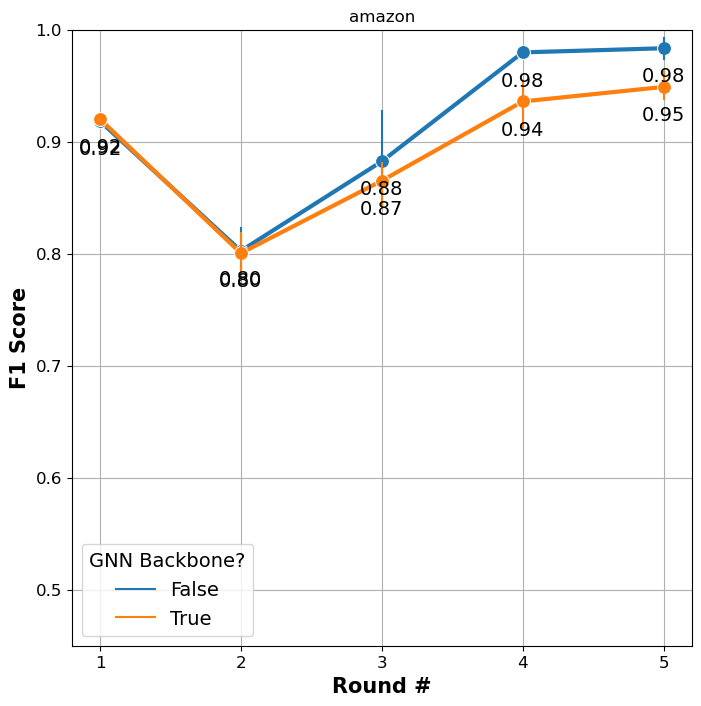

c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

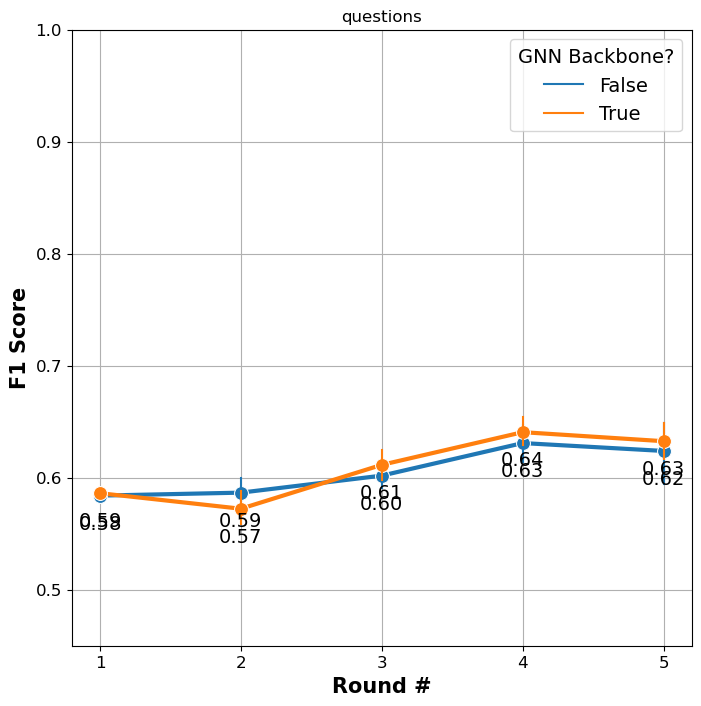

c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

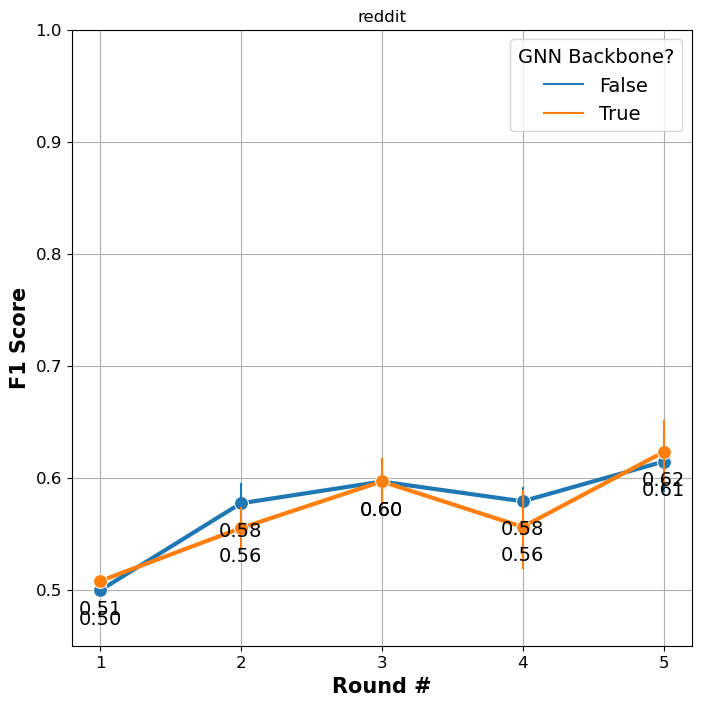

c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

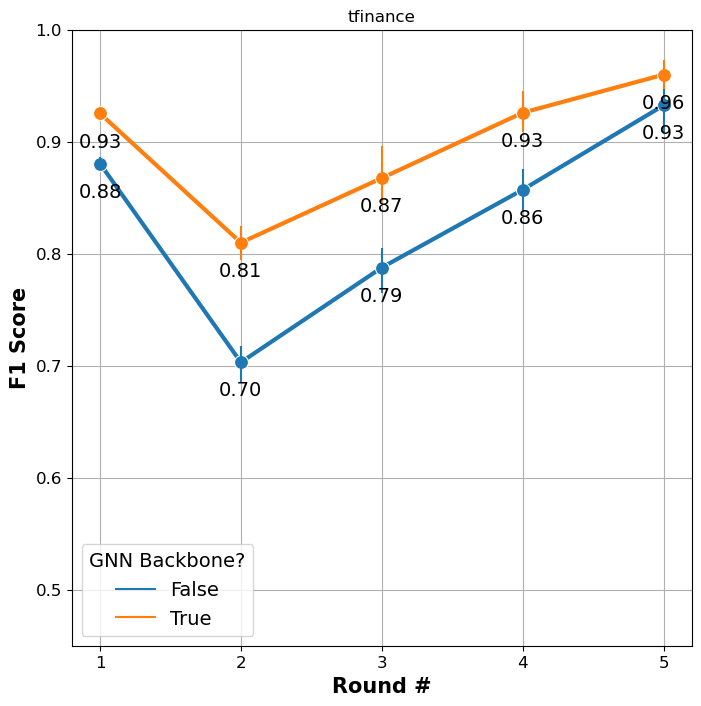

c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

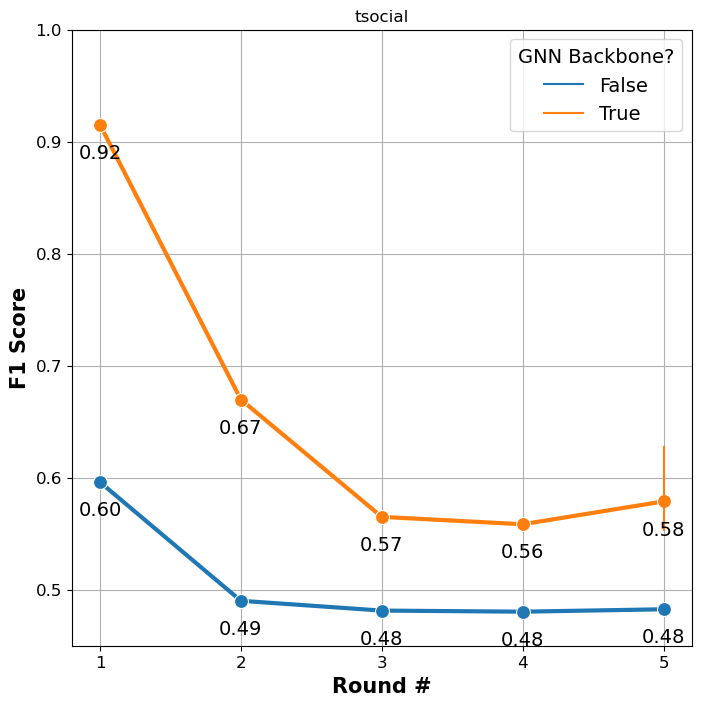

c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

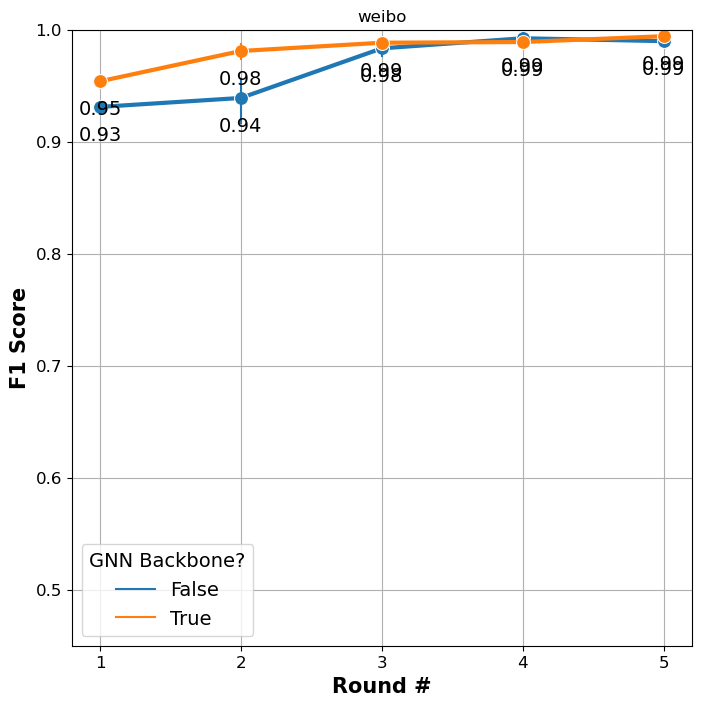

c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

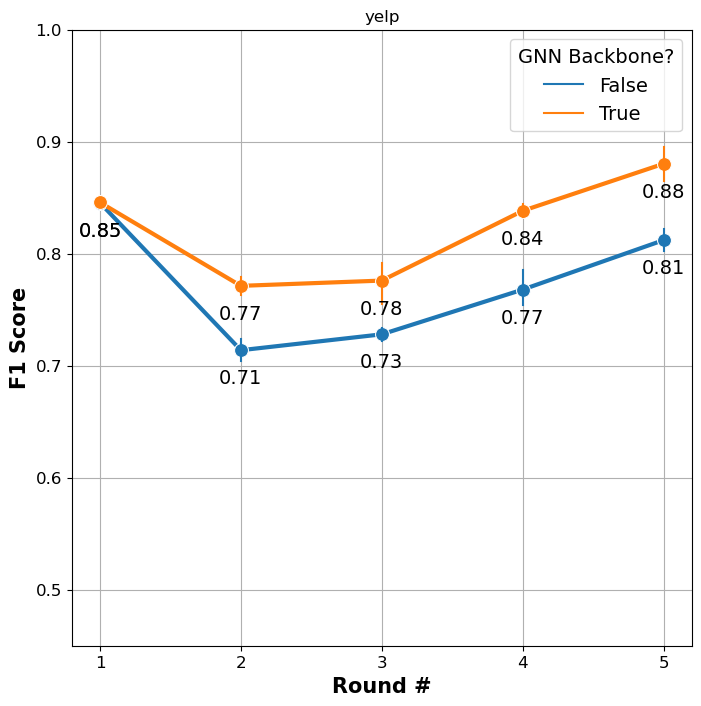

In [4]:
import matplotlib.pyplot as plt
from matplotlib import ticker


out_colname = 'dset_name'
out_col_vals = round_result_df[out_colname].unique()
for out_val in out_col_vals:
    temp_df = round_result_df.query(f'{out_colname} == "{out_val}"')

    colname = 'agg_backbone'
    col_vals = temp_df[colname].unique()
    data = []

    for val in col_vals:
        data.append(temp_df.groupby([colname, 'round_int'])[['f1', 'auc']].mean().reset_index().query(f'{colname} == "{val}" & round_int < 6')[['round_int', 'f1']].values)

    fig, ax = plt.subplots(figsize=(8, 8))
    p1 = sb.lineplot(data=temp_df.query('round_int < 6'), x='round_int', y='f1', hue=colname, linewidth=3, err_style='bars', marker='o', markersize=10)
    plt.legend()

    for vals in data:
        for i in vals:
                ax.text(i[0], i[1] - 0.025,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    plt.legend(title='GNN Backbone?', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.45, 1))
    plt.title(out_val)


    plt.grid()
    plt.show()


# Longer Round

In [5]:
round_df = pd.read_csv('../result/240313-064243.csv')
round_df['proto_num'] = round_df['proto_num'].astype(str)
round_df['round_int'] = round_df.apply(lambda x: int(x['round'][6]) + 1, axis=1)
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['greedy_seed', 'feat_coef', 'conn_coef', 'trial', 'round_int'])
round_result_df['f1_degradation'] = (round_result_df['f1'] - round_result_df['f1'].shift(-1))
round_result_df['auc_degradation'] = (round_result_df['auc'] - round_result_df['auc'].shift(-1))
round_result_df['agg_backbone'] = (round_result_df['boost_agg_backbone'] == "<class 'models.benchmarks_supervised.booster.GIN_noparam'>").astype(str)

final_df = round_result_df.groupby(['greedy_seed', 'feat_coef', 'conn_coef', 'round_int'])[['f1', 'f1_degradation', 'auc', 'auc_degradation', 'tp', 'fp', 'tn', 'fn']].agg(['mean', 'std']).reset_index()
final_df.columns = [' '.join(col).strip() for col in final_df.columns.values]


c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hafizhadi\AppData\Local\miniconda3\envs\base-dglpyg\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hafizhadi\AppData\Local\miniconda3\env

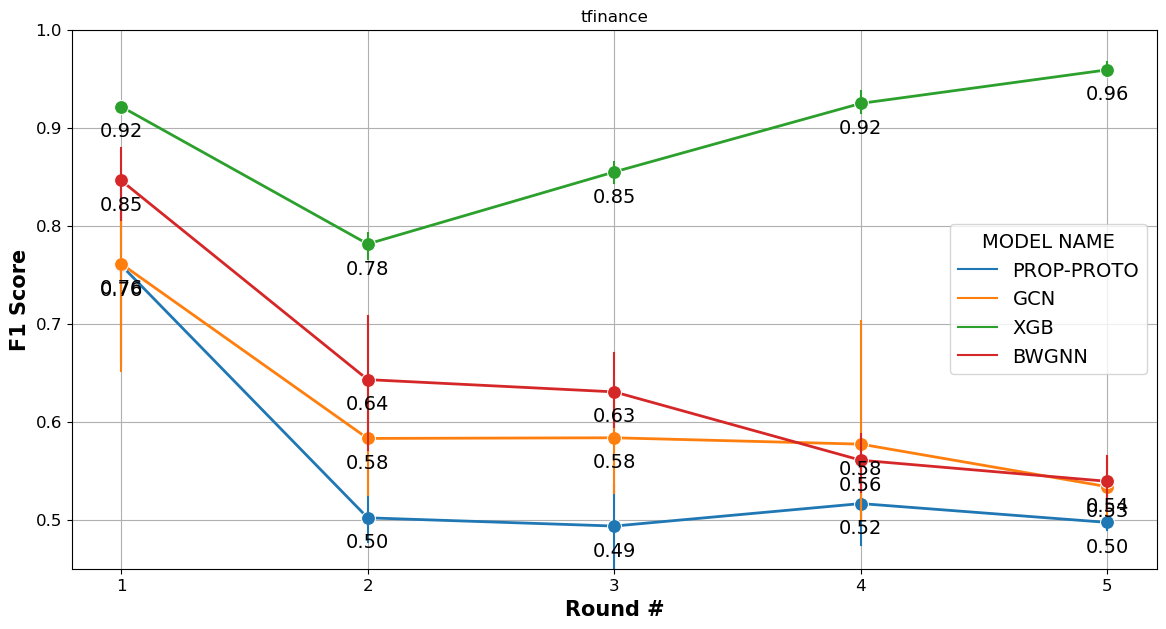

In [8]:
import matplotlib.pyplot as plt
from matplotlib import ticker


out_colname = 'dset_name'
out_col_vals = round_result_df[out_colname].unique()
for out_val in out_col_vals:
    temp_df = round_result_df.query(f'{out_colname} == "{out_val}"')

    colname = 'model_name'
    col_vals = temp_df[colname].unique()
    data = []

    for val in col_vals:
        data.append(temp_df.groupby([colname, 'round_int'])[['f1', 'auc']].mean().reset_index().query(f'{colname} == "{val}"')[['round_int', 'f1']].values)

    fig, ax = plt.subplots(figsize=(14, 7))
    p1 = sb.lineplot(data=temp_df, x='round_int', y='f1', hue=colname, linewidth=2, err_style='bars', marker='o', markersize=10)
    plt.legend()

    for vals in data:
        for i in vals:
                ax.text(i[0], i[1] - 0.025,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    plt.legend(title='MODEL NAME', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.45, 1))
    plt.title(out_val)


    plt.grid()
    plt.show()


# General

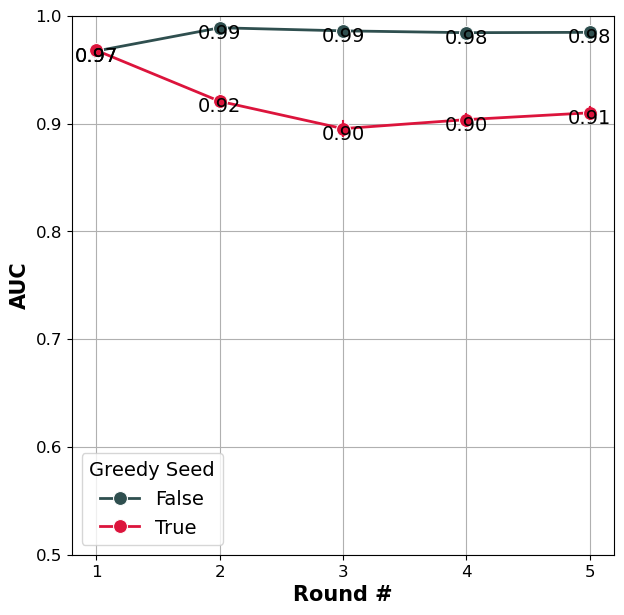

In [290]:
import matplotlib.pyplot as plt
from matplotlib import ticker

true_means = round_result_df.groupby(['greedy_seed', 'round_int'])[['f1', 'auc']].mean().reset_index().query('greedy_seed == True & round_int < 6')[['round_int', 'auc']].values
false_means = round_result_df.groupby(['greedy_seed', 'round_int'])[['f1', 'auc']].mean().reset_index().query('greedy_seed == False & round_int < 6')[['round_int', 'auc']].values

fig, ax = plt.subplots(figsize=(7, 7))
p1 = sb.lineplot(data=round_result_df.query('round_int < 6'), x='round_int', y='auc', hue='greedy_seed', palette=['darkslategray', 'crimson'], linewidth=2, err_style='bars', marker='o', markersize=10)

for vals in [true_means, false_means]:
    for i in vals:
            ax.text(i[0], i[1] - 0.005,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

plt.legend(title='Greedy Seed', fontsize='14', title_fontsize='14')
plt.xlabel("Round #", fontsize=15, fontweight='bold')
plt.ylabel("AUC", fontsize=15, fontweight='bold')
plt.xticks(np.arange(1, 6, 1), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((0.5, 1))


plt.grid()
plt.show()


In [335]:
round_df = pd.read_csv('../result/240227-102257.csv')
round_df['round_int'] = round_df.apply(lambda x: int(x['round'][6]) + 1, axis=1)
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['greedy_seed', 'feat_coef', 'conn_coef', 'trial', 'round'])
round_result_df['f1_degradation'] = (round_result_df['f1'] - round_result_df['f1'].shift(-1))
round_result_df['auc_degradation'] = (round_result_df['auc'] - round_result_df['auc'].shift(-1))

final_df = round_result_df.groupby(['greedy_seed', 'feat_coef', 'conn_coef', 'round_int'])[['f1', 'f1_degradation', 'auc', 'auc_degradation', 'tp', 'fp', 'tn', 'fn']].agg(['mean', 'std']).reset_index()
final_df.columns = [' '.join(col).strip() for col in final_df.columns.values]

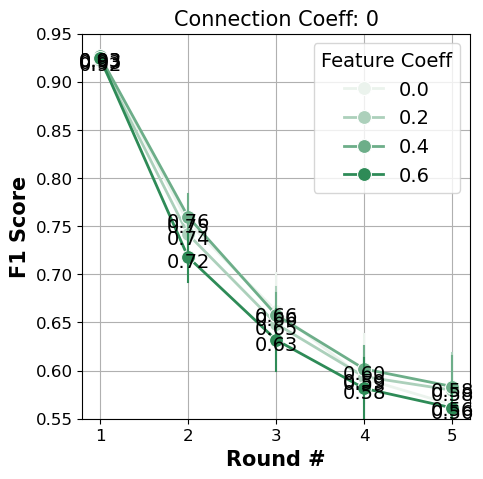

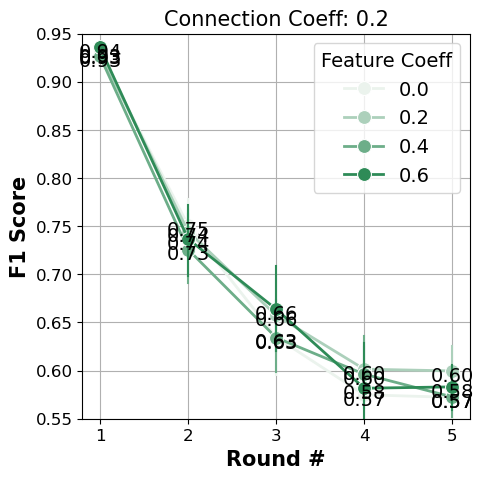

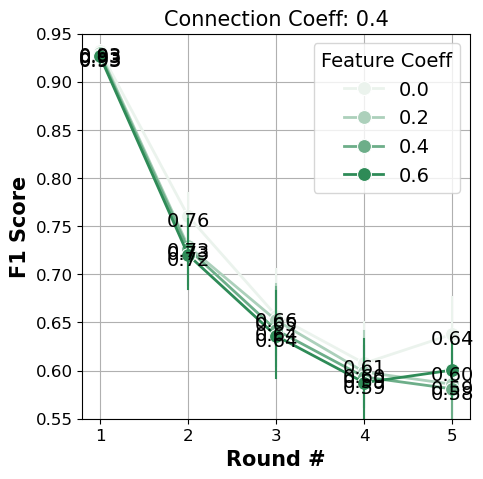

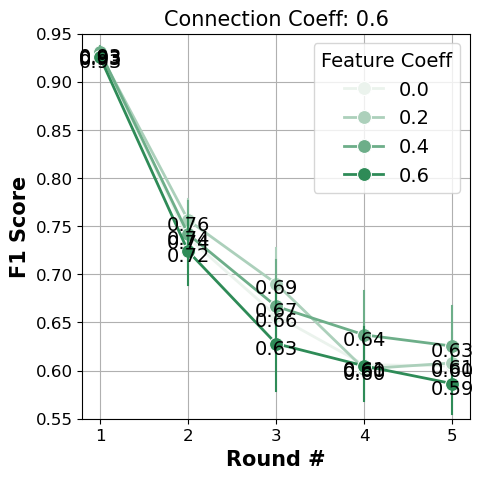

In [336]:
import matplotlib.pyplot as plt
from matplotlib import ticker

for ccoef in [0, 0.2, 0.4, 0.6]:
#for fcoef in [0, 1, 2, 3]:
    gseed = True
    res = [round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}').groupby(['feat_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]
    #res = [round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}').groupby(['conn_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]

    fig, ax = plt.subplots(figsize=(5, 5))
    p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}'), x='round_int', y='f1', hue='feat_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))
    #p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}'), x='round_int', y='f1', hue='conn_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))

    for vals in res:
        for i in vals:
                ax.text(i[0], i[1] - 0.005,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    plt.title(f"Connection Coeff: {ccoef}", fontsize=15)
    #plt.title(f"Feature Coeff: {fcoef}", fontsize=15)
    plt.legend(title='Feature Coeff', fontsize='14', title_fontsize='14')
    #plt.legend(title='Connection Coeff', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.55, 0.95))


    plt.grid()
    plt.show()

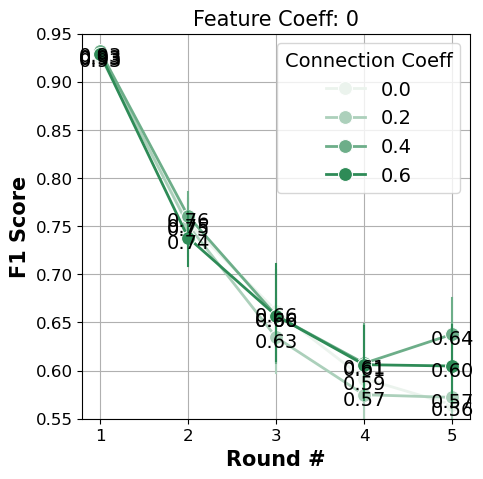

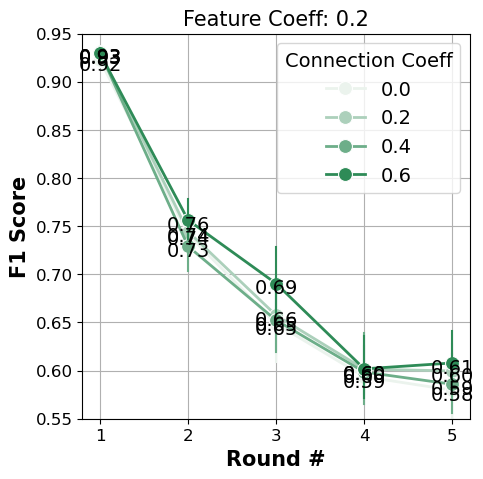

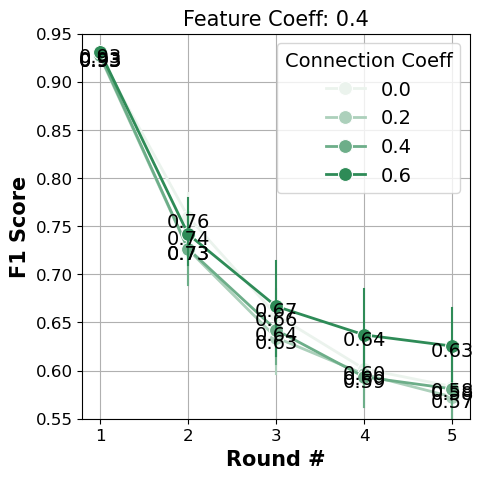

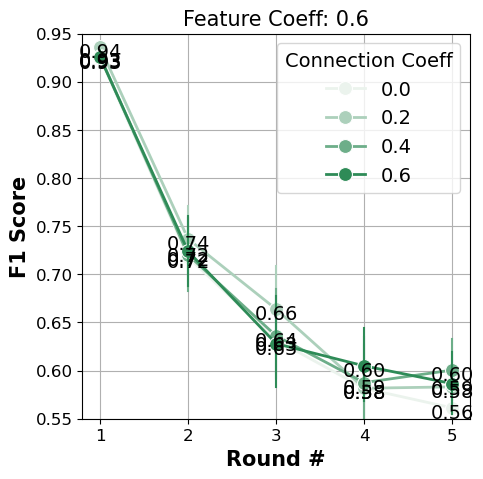

In [339]:
import matplotlib.pyplot as plt
from matplotlib import ticker

#for ccoef in [0, 0.2, 0.4, 0.6]:
for fcoef in [0, 0.2, 0.4, 0.6]:
    gseed = True
    #res = [round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}').groupby(['feat_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]
    res = [round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}').groupby(['conn_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]

    fig, ax = plt.subplots(figsize=(5, 5))
    #p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}'), x='round_int', y='f1', hue='feat_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))
    p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}'), x='round_int', y='f1', hue='conn_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))

    for vals in res:
        for i in vals:
                ax.text(i[0], i[1] - 0.005,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    #plt.title(f"Connection Coeff: {ccoef}", fontsize=15)
    plt.title(f"Feature Coeff: {fcoef}", fontsize=15)
    #plt.legend(title='Feature Coeff', fontsize='14', title_fontsize='14')
    plt.legend(title='Connection Coeff', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.55, 0.95))


    plt.grid()
    plt.show()

In [332]:
round_df = pd.read_csv('../result/240227-143734.csv')
round_df['round_int'] = round_df.apply(lambda x: int(x['round'][6]) + 1, axis=1)
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['greedy_seed', 'feat_coef', 'conn_coef', 'trial', 'round'])
round_result_df['f1_degradation'] = (round_result_df['f1'] - round_result_df['f1'].shift(-1))
round_result_df['auc_degradation'] = (round_result_df['auc'] - round_result_df['auc'].shift(-1))

final_df = round_result_df.groupby(['greedy_seed', 'feat_coef', 'conn_coef', 'round_int'])[['f1', 'f1_degradation', 'auc', 'auc_degradation', 'tp', 'fp', 'tn', 'fn']].agg(['mean', 'std']).reset_index()
final_df.columns = [' '.join(col).strip() for col in final_df.columns.values]

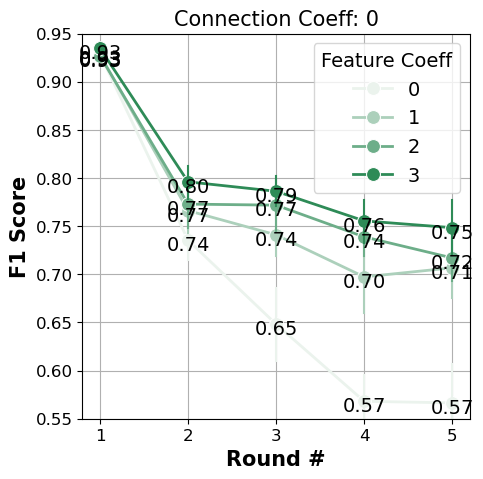

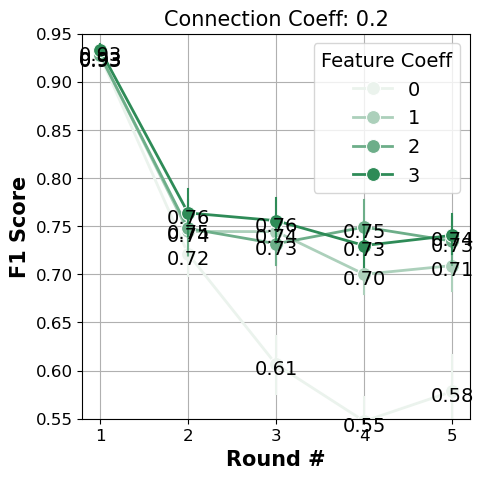

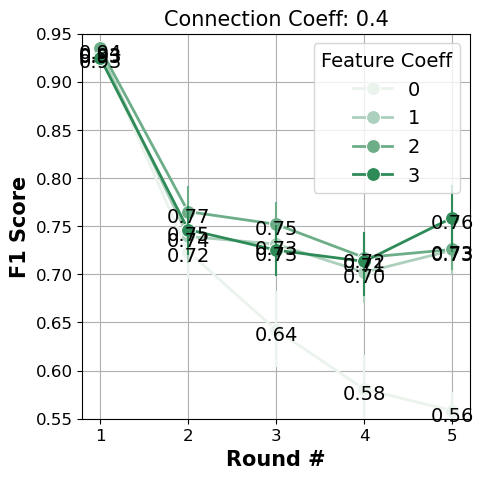

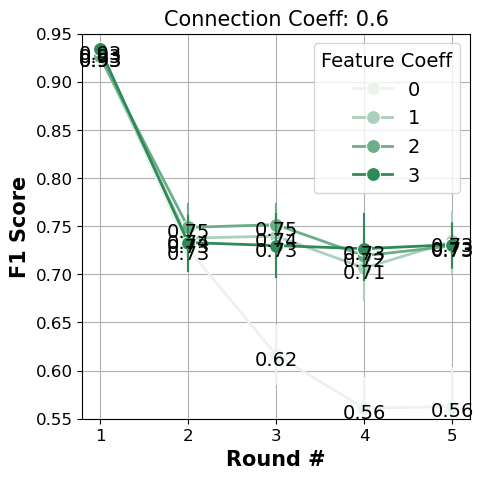

In [334]:
import matplotlib.pyplot as plt
from matplotlib import ticker

for ccoef in [0, 0.2, 0.4, 0.6]:
#for fcoef in [0, 1, 2, 3]:
    gseed = True
    res = [round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}').groupby(['feat_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]
    #res = [round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}').groupby(['conn_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]

    fig, ax = plt.subplots(figsize=(5, 5))
    p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}'), x='round_int', y='f1', hue='feat_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))
    #p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}'), x='round_int', y='f1', hue='conn_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))

    for vals in res:
        for i in vals:
                ax.text(i[0], i[1] - 0.005,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    plt.title(f"Connection Coeff: {ccoef}", fontsize=15)
    #plt.title(f"Feature Coeff: {fcoef}", fontsize=15)
    plt.legend(title='Feature Coeff', fontsize='14', title_fontsize='14')
    #plt.legend(title='Connection Coeff', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.55, 0.95))


    plt.grid()
    plt.show()

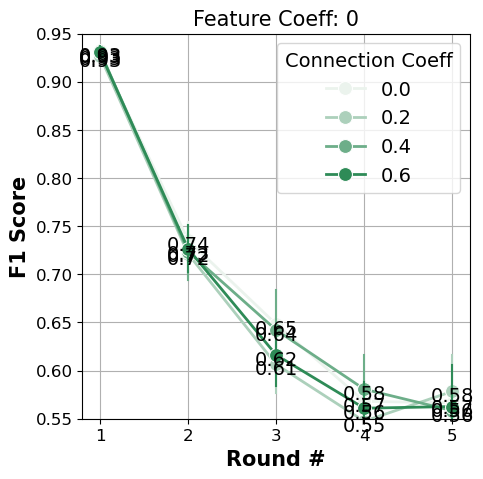

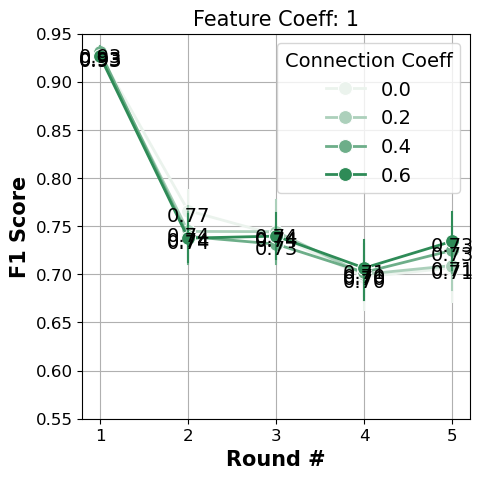

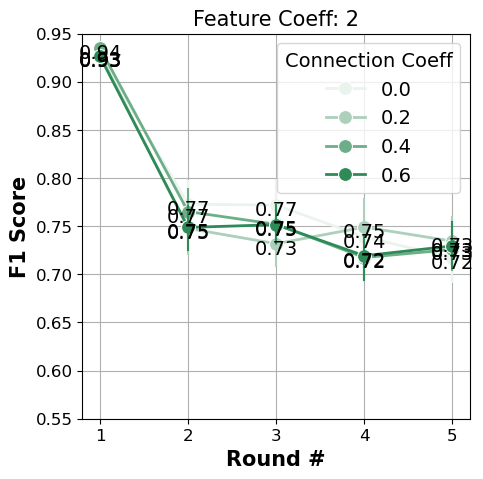

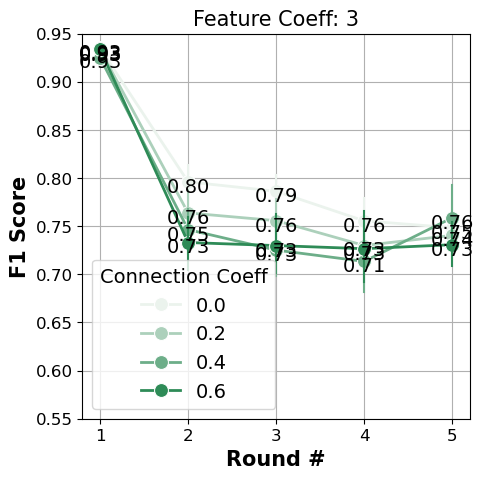

In [330]:
import matplotlib.pyplot as plt
from matplotlib import ticker

#for ccoef in [0, 0.2, 0.4, 0.6]:
for fcoef in [0, 1, 2, 3]:
    gseed = True
    #res = [round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}').groupby(['feat_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]
    res = [round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}').groupby(['conn_coef', 'round_int'])[['f1', 'auc']].mean().reset_index()[['round_int', 'f1']].values]

    fig, ax = plt.subplots(figsize=(5, 5))
    #p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & conn_coef == {ccoef}'), x='round_int', y='f1', hue='feat_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))
    p1 = sb.lineplot(data=round_result_df.query(f'greedy_seed == {gseed} & feat_coef == {fcoef}'), x='round_int', y='f1', hue='conn_coef', linewidth=2, err_style='bars', marker='o', markersize=10, palette=sb.light_palette("seagreen", as_cmap=True))

    for vals in res:
        for i in vals:
                ax.text(i[0], i[1] - 0.005,f'{i[1]:.2f}', size=14, horizontalalignment='center', verticalalignment='center')

    #plt.title(f"Connection Coeff: {ccoef}", fontsize=15)
    plt.title(f"Feature Coeff: {fcoef}", fontsize=15)
    #plt.legend(title='Feature Coeff', fontsize='14', title_fontsize='14')
    plt.legend(title='Connection Coeff', fontsize='14', title_fontsize='14')
    plt.xlabel("Round #", fontsize=15, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=15, fontweight='bold')
    plt.xticks(np.arange(1, 6, 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim((0.55, 0.95))


    plt.grid()
    plt.show()